https://blog.csdn.net/program_developer/article/details/85274825

In [4]:
import numpy as np

# LCS

In [134]:
def DP(A, B):
    nA, nB = len(A), len(B)
    dp = np.zeros((nA, nB))
    for i in range(nA):
        if A[i] == B[0]:
            dp[i:, 0] = 1
            break
    for i in range(nB):
        if A[0] == B[i]:
            dp[0, i:] = 1
            break
    for i in range(1, nA):
        for j in range(1, nB):
            if A[i] == B[j]:
                dp[i, j] = max(dp[i-1, j-1]+1, dp[i-1, j], dp[i, j-1])
#                 dp[i, j] = (dp[i-1, j-1]+1)
            else:
                dp[i, j] = max(dp[i-1, j], dp[i, j-1])
    return dp

In [136]:
def DP(A, B):
    nA, nB = len(A), len(B)
    dp = [[0 for i in range(nB)] for j in range(nA)]
    for i in range(nA):
        if A[i] == B[0]:
            for j in range(i, nA):
                dp[j][0] = 1
            break
    for i in range(nB):
        if A[0] == B[i]:
            for j in range(i, nB):
                dp[0][j] = 1
            break
    for i in range(1, nA):
        for j in range(1, nB):
            if A[i] == B[j]:
                dp[i][j] = max(dp[i-1][j-1]+1, dp[i-1][j], dp[i][j-1])
#                 dp[i, j] = (dp[i-1, j-1]+1)
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp

In [61]:
A = '1A2C3D4B56'
B = 'B1D23CA45B6A'
A, B

('1A2C3D4B56', 'B1D23CA45B6A')

In [137]:
DP(A, B)

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
 [0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3],
 [0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3],
 [0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
 [0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4],
 [1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5],
 [1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5],
 [1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6]]

# Climbing stairs

In [140]:
# n stairs, how many ways of climbing
def c_s(n):
    """
    DP for climbing stairs, each step can be 1-stair or 2-stair
    """
    f0 = 1
    f1 = 1
    for i in range(n):
        f0, f1 = f1, f1+f0
    return f0

In [155]:
c_s(9)

55

# Queen

In [108]:
# DFS
def isValid(record, i, j):
    """
    check if it's valid to place in pos (i,j)
    """
    for k in range(i):
        if (j == record[k]) or (abs(record[k]-j) == abs(i-k)):
            return False
    return True

def process(i, record, n):
    """
    """
    if i == n:
        return 1
    res = 0
    for j in range(n):
        if isValid(record, i, j):
            record[i] = j
            res += process(i+1, record, n)
    return res

def num1(n):
    """
    """
    if n<1:
        return 0
    record = [None for _ in range(n)]
    res = process(0, record, n)
    del record
    return res

In [109]:
num1(8)

92

# MSA

In [110]:
# maximum subarray

给定一个整数数组 nums ，找到一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

示例:

输入: [-2,1,-3,4,-1,2,1,-5,4],
输出: 6
解释: 连续子数组 [4,-1,2,1] 的和最大，为 6。
进阶:

如果你已经实现复杂度为 O(n) 的解法，尝试使用更为精妙的分治法求解。

In [119]:
def MSF(nums):
    """
    dp[i]: the maximum sum of subarrays ending with the ith number
    """
    n = len(nums)
    if n == 0:
        return None
    elif n == 1:
        return nums[0]
    dp = [-float('inf')] * n
    dp[0] = nums[0]
    for i in range(1, n):
        dp[i] = max(nums[i], dp[i-1]+nums[i])
    return max(dp)

In [120]:
MSF([-2,1,-3,4,-1,2,1,-5,4])

6

# LIS
Longest Increasing Subsequence (300)

Given an unsorted array of integers, find the length of longest increasing subsequence.

For example,
Given [10, 9, 2, 5, 3, 7, 101, 18],
The longest increasing subsequence is [2, 3, 7, 101], therefore the length is 4. Note that there may be more than one LIS combination, it is only necessary for you to return the length.

Your algorithm should run in O(n2) complexity.

Follow up: Could you improve it to O(n log n) time complexity?

Credits:
Special thanks to @pbrother for adding this problem and creating all test cases.

In [123]:
def LIS(nums):
    """
    longest incresing subarray
    """
    n = len(nums)
    if n == 0:
        return None
    elif n == 1:
        return 1
    dp = [1] * n
    for i in range(1, n):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j]+1)
    return max(dp)

In [124]:
LIS([10, 9, 2, 5, 3, 7, 101, 18])

4

# MED

Minimum Edit Distance(Levenshtein Distance 72)

https://www.jianshu.com/p/a617d20162cf

字符串最短编辑距离。输入两个字符串String a, String b
dp[aLen + 1][bLen + 1]，dp[i][j]表示字符串a的i位置之前的子串和b的j位置之前的子串的最短编辑距离。
边界初始条件dp[i][0] 是i，dp[0][j]是j，这是显而易见的，因为一个空串和一个长度为l的字符串的编辑距离，就是l。
状态转移方程还是从末尾看起，根据末尾a[i]和b[j]是不是相等，转移情况分为：

如果a[i] == b[j]（注意我们代码中的dp定义的下标都是比字符串的下标前进一个，上面那个题目也是这样的，这里只是为了说明方便一些，让字符串的下标从1开始了），那么这一位就是不需要编辑的。dp[i][j] = dp[i - 1][j - 1]；
如果a[i] != b[j]，这个情况就比较复杂了，这涉及到我们怎么去操作。
a.修改操作，如果把a[i]改成b[j]，或者b[j]改成a[i]，那么就操作数加一，两个同时往前缩，我们去关注前面的子串，这样dp[i][j] = dp[i - 1][j - 1] + 1
b.删除操作，把a[i]直接删除掉，去看a的前面的子串有没有可能跟b相等，那么操作数加一，这时候关注的a的指针要前移一位，而对b则还是关注原来的位置，这样dp[i][j] = dp[i - 1][j] + 1，而同理可以去删除b[i]，对应的状态转移方程为dp[i][j] = dp[i][j - 1] + 1
c.添加操作，在a[i]后面去追加个b[i]，这样相当于把a的关注的指针后移到了i+1处，那么接下来要往前缩了，a往前缩就是i，b往前缩就是i-1，所以dp[i][j] = dp[i][j - 1]，而同理，去给b加a[i]的话，结果就是dp[i][j] = dp[i - 1][j]
然后上面的abc中总共下来其实就是3个状态转移方程，取其中的最小值即可。

In [143]:
import numpy as np

In [161]:
def ED(A, B):
    """
    edit distance between string A and B
    """
    na, nb = len(A), len(B)
    dp = [[float('inf') for _ in range(nb+1)] for _ in range(na+1)]
    for i in range(na+1):
        dp[i][0] = i
    for j in range(nb+1):
        dp[0][j] = j
    for i in range(1, na+1):
        for j in range(1, nb+1):
            dp[i][j] = min(dp[i-1][j-1] + (A[i-1] != B[j-1]), dp[i-1][j]+1, dp[i][j-1]+1)
    return dp

In [156]:
ED('cafe', 'coffee')

array([[0, 1, 2, 3, 4, 5, 6],
       [1, 0, 1, 2, 3, 4, 5],
       [2, 1, 1, 2, 3, 4, 5],
       [3, 2, 2, 1, 2, 3, 4],
       [4, 3, 3, 2, 2, 2, 3]])

In [159]:
# recursion
def Levenshtein_Distance_Recursive(str1, str2):

    if len(str1) == 0:
        return len(str2)
    elif len(str2) == 0:
        return len(str1)
    elif str1 == str2:
        return 0

    if str1[len(str1)-1] == str2[len(str2)-1]:
        d = 0
    else:
        d = 1
    
    return min(Levenshtein_Distance_Recursive(str1, str2[:-1]) + 1,
                Levenshtein_Distance_Recursive(str1[:-1], str2) + 1,
                Levenshtein_Distance_Recursive(str1[:-1], str2[:-1]) + d)

print(Levenshtein_Distance_Recursive("cafe", "coffee"))

3


In [162]:
%timeit ED('cafe', 'coffee')

19 µs ± 700 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [160]:
%timeit (Levenshtein_Distance_Recursive("cafe", "coffee"))

458 µs ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Longest Palindromic Substring

输入字符串s

dp[s.size()][s.size()],dp[i][j]表示s[i]到s[j]是否为回文串，dp[i][j]为1表示是，dp[i][j]为0表示不是。
根据s[i]和s[j]是否相等，转移情况如下：

s[i] == s[j]，这样的话如果s[i + 1] 到 s[j - 1]是回文串，那么i到j就是回文串，如果s[i + 1]到s[j - 1]不是回文串，那么i到j就不是回文串。dp[i][j] = dp[i + 1][j - 1]
s[i] != s[j]，这样的话s[i]到s[j]一定不是回文串。dp[i][j] = 0

边界初始条件显然是dp[i][i] = 1,自己到自己肯定是个回文，而dp[i][i + 1] = (S[i] == S[i + 1]) ? 1 : 0也是显然的。通过边界条件确定了长度为1和2的回文。这里会遇到一个问题我们枚举i和j的时候，如果按照常规的从小到大的顺序（外层写个i递增，里层嵌套一个j从i递增到尾部，去枚举所有的dp[i][j]），就有可能导致状态无法转移，也就是说dp[i][j]依赖的dp[i+1][j-1]可能还没有计算。这个具体实例参考算法笔记。我们这里要换个思路去枚举i,j，保证每次都能正常的状态转移，我们考虑按照子串的长度和子串的初始位置进行枚举，第一遍将长度为3的子串dp全部求出来，第二遍求4的......代码如下：
我们先来求一下最长的长度

In [198]:
def LPS(s):
    """
    longest palindromic substring
    """
    n = len(s)
    dp = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        dp[i][i] = 1
        if (i+1<n) and (s[i]==s[i+1]):
            dp[i][i+1] = 1
    ans = 1
    # the length of palindromes
    for L in range(3, n+1):
        # first position of the palindrome, head of length L palindrome
        # n-(L-1) iterations, that is range(0, n-(L-1))
        for i in range(n-(L-1)):
            # last position of the palindrome being tested, tail of length L palindrome
            j = i+L-1
            if (s[i]==s[j]) and (dp[i+1][j-1] == 1):
                dp[i][j] = 1
                ans = L
    return ans

In [207]:
LPS('123464321')

9

# Triangle (120)

Description：

Given a triangle, find the minimum path sum from top to bottom. Each step you may move to adjacent numbers on the row below.

For example, given the following triangle
```
 [
     [2],
    [3,4],
   [6,5,7],
  [4,1,8,3]
]
```
The minimum path sum from top to bottom is 11 (i.e., 2 + 3 + 5 + 1 = 11).

Note:

Bonus point if you are able to do this using only O(n) extra space, where n is the total number of rows in the triangle.

dp[i][j] represents the opt when in position [i][j]

In [281]:
tri =  [
     [2],
    [3,4],
   [6,5,7],
  [4,1,8,3]
]

In [282]:
def T(tri):
    """
    top-down DP for triangle
    """
    import copy
    tri = copy.deepcopy(tri)
    for i in range(1, len(tri)):
        tri[i][0] += tri[i-1][0]
        tri[i][-1] += tri[i-1][-1]
        for j in range(1, len(tri[i])-1):
            tri[i][j] += min(tri[i-1][j], tri[i-1][j-1])
    return min(tri[-1])

In [287]:
T(tri)

11

In [229]:
class Solution(object):
    def minimumTotal(self, triangle):
        triangle = triangle.deepcopy()
        for i in range(1, len(triangle)):
            triangle[i][0] += triangle[i-1][0]
            triangle[i][len(triangle[i])-1] += triangle[i-1][len(triangle[i-1])-1]
            for j in range(1,len(triangle[i])-1):
                triangle[i][j] += min(triangle[i-1][j], triangle[i-1][j-1])
        return min(triangle[-1])

In [254]:
def T(tri):
    """
    bottom-up DP for triangle
    """
    n = len(tri)
    dp = [[] for _ in range(n)]
    for i in range(n-1, -1, -1):
        for j in range(len(tri[i])):
            if i == n-1:
                dp[i].append(tri[i][j])
            else:
                dp[i].append(min(dp[i+1][j], dp[i+1][j+1]) + tri[i][j])
    return dp

In [255]:
tri

[[2], [3, 4], [6, 5, 7], [4, 1, 8, 3]]

In [258]:
T(tri)

[[11], [9, 10], [7, 6, 10], [4, 1, 8, 3]]

In [257]:
T(tri)[0][0]

11

64. Minimum Path Sum
Description：

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

Example:

 Input:
```
[
  [1,3,1],
  [1,5,1],
  [4,2,1]
]
```
Output: 7

Explanation: Because the path 1→3→1→1→1 minimizes the sum.

In [289]:
mat = [
  [1,3,1],
  [1,5,1],
  [4,2,1]
]

In [308]:
def MPS(mat):
    """
    find the minimum path sum from top-left to bottom-right
    """
    m, n = len(mat), len(mat[0])
    dp = [[None for _ in range(n)] for _ in range(m)]
    dp[0][0] = mat[0][0]
    for i in range(1, m):
        dp[i][0] = dp[i-1][0] + mat[i][0]
    for j in range(1, n):
        dp[0][j] = dp[0][j-1] + mat[0][j]
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = mat[i][j] + min(dp[i][j-1], dp[i-1][j])
    return dp[-1][-1]

In [320]:
m=5

In [322]:
list(range(m-1, 0-1, -1))

[4, 3, 2, 1, 0]

In [326]:
list(reversed(range(0, m-1)))

[3, 2, 1, 0]

In [336]:
def MPS2(mat):
    """
    find the minimum path sum from bottom-right to top-left 
    """
    m, n = len(mat), len(mat[0])
    dp = [[None for _ in range(n)] for _ in range(m)]
    dp[-1][-1] = mat[-1][-1]
    for i in reversed(range(0, m-1)):
        dp[i][-1] = dp[i+1][-1] + mat[i][-1]
    for j in reversed(range(0, n-1)):
        dp[-1][j] = dp[-1][j+1] + mat[-1][j]
    for i in reversed(range(0, m-1)):
        for j in reversed(range(0, n-1)):
            dp[i][j] = mat[i][j] + min(dp[i+1][j], dp[i][j+1])
    return dp[0][0]

In [340]:
%timeit MPS(mat)

4.34 µs ± 43 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [341]:
%timeit MPS2(mat)

5.02 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [337]:
MPS(mat), MPS2(mat)

(7, 7)

In [339]:
MPS([[1,2,5],[3,2,1]]), MPS2([[1,2,5],[3,2,1]])

(6, 6)

In [342]:
def MPS_recursion(mat):
    """
    do recursive MPS from bottom-right to top-left
    """
    m, n = len(mat), len(mat[0])
    
    def rec(mat, row, col):
        """
        """
        
        if row == m-1 and col == n-1:
            return mat[row][col]
        if row == m-1:
            return mat[row][col] + rec(mat, row, col+1)
        if col == n-1:
            return mat[row][col] + rec(mat, row+1, col)
        return mat[row][col] + min(rec(mat, row+1, col), rec(mat, row, col+1))
    
    return rec(mat, 0, 0)

In [345]:
MPS_recursion(mat)

7

In [344]:
%timeit MPS_recursion(mat)

4.76 µs ± 31.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 343. Integer Break

Description：

Given a positive integer n, break it into the sum of at least two positive integers and maximize the product of those integers. Return the maximum product you can get.

Example 1:

 Input: 2

Output: 1

Explanation: 2 = 1 + 1, 1 × 1 = 1.

Example 2:


Input: 10

Output: 36

Explanation: 10 = 3 + 3 + 4, 3 × 3 × 4 = 36.

Note: You may assume that n is not less than 2 and not larger than 58.

In [379]:
def IB_rec(n):
    """
    interger break recursively
    """
    
    if n == 1 or n == 2:
        return 1
    res = -float('inf')
    for i in range(1, n):
#         print(res)
        res = max(res, i*IB_rec(n-i), i*(n-i))
    return res

In [384]:
def IB_memo(n):
    """
    interger break memo
    """
    rec = {}
    def ib(n, rec):
        if n in rec:
            return rec[n]
        if n == 1 or n == 2:
            rec[n] = 1
            return rec[n]
        res = -float('inf')
        for i in range(1, n):
    #         print(res)
            res = max(res, i*ib(n-i, rec), i*(n-i))
        rec[n] = res
        return rec[n]
    return ib(n, rec)

In [425]:
def IB_dp(n):
    """
    interger break dp
    """
    if n == 1 or n == 2:
        return 1
    # dp[i] maximum prod of numbers with sum of (i+1)
    dp = [0] * n
    dp[0], dp[1] = 1, 1
    for i in range(2, n):
        tmp = -float('inf')
        for j in range(1, i+1):
            tmp = max(tmp, j*(i+1-j), j*dp[i-j])
        dp[i] = tmp
    return dp[-1]

In [413]:
IB_rec(20), IB_memo(20), IB_dp(20)

(1458, 1458, 1458)

In [386]:
%timeit IB_rec(20)

170 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [387]:
%timeit IB_memo(20)

79.8 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [414]:
%timeit IB_dp(20)

49.8 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [404]:
import time
import matplotlib.pyplot as plt

In [444]:
t_rec = []
for n in range(1, 20):
    t0 = time.time_ns()
    IB_rec(n)
    t_elapsed = time.time_ns() - t0
    t_rec.append(t_elapsed)

In [445]:
t_memo = []
for n in range(1, 20):
    t0 = time.time_ns()
    IB_memo(n)
    t_elapsed = time.time_ns() - t0
    t_memo.append(t_elapsed)

In [446]:
t_dp = []
for n in range(1, 20):
    t0 = time.time_ns()
    IB_dp(n)
    t_elapsed = time.time_ns() - t0
    t_dp.append(t_elapsed)

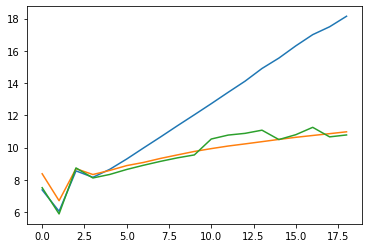

In [449]:
plt.plot(np.log(t_rec))
plt.plot(np.log(t_memo))
plt.plot(np.log(t_dp))

# Max non-neighboring sum

Given a list of numbers, find the maximum of sums of non-neighboring members.

```
[1, 2, 5, 4, 3, 7, 2, 1]
```

In [450]:
arr = [1, 2, 5, 4, 3, 7, 2, 1]

In [456]:
def MNS(arr):
    """
    """
    dp = [None] * len(arr)
    dp[0] = arr[0]
    dp[1] = max(arr[0], arr[1])
    for i in range(2, len(arr)):
        dp[i] = max(dp[i-1], dp[i-2]+arr[i])
    return dp

In [457]:
MNS(arr)

[1, 2, 6, 6, 9, 13, 13, 14]

# 279. Perfect Squares

Description：

Given a positive integer n, find the least number of perfect square numbers (for example, 1, 4, 9, 16, ...) which sum to n.

Example 1:

Input: n = 12

Output: 3 

Explanation: 12 = 4 + 4 + 4.

Example 2:

Input: n = 13

Output: 2

Explanation: 13 = 4 + 9.

In [462]:
import math

+ Brute force DP, iterative over n

In [482]:
def PS(n):
    """
    perfect squares
    """
    # starting from dp[0]
    dp = [None] * (n+1)
    dp[0] = 0
    for i in range(1, n+1):
        if int(math.sqrt(i)) ** 2 == i:
            dp[i] = 1
        else:
            tmp = float('inf')
            for j in range(1, int(i/2)+1):
#                 print(i, j)
                tmp = min(tmp, dp[j]+dp[i-j])
            dp[i] = tmp
    return dp[-1]

In [473]:
PS(12), PS(13)

(3, 2)

+ A cleverer way iterating over squared number

In [836]:
class Solution0(object):
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        dp = [float('inf')] * (n+1)
        dp[0] = 0
        # iterate over all possible square numbers that can comprise n
        for i in range(1, int(math.sqrt(n))+1):
#             print(dp)
            # all numbers might contain such a square number
            for j in range(i**2, n+1):
                # iterate from beginning to end, dp[12] refers to dp[8], which is previously computed.
#                 print(j, i**2)
                dp[j] = min(dp[j], dp[j-i**2]+1)
        return dp[-1]

In [837]:
s0 = Solution0()
s0.numSquares(12), s0.numSquares(13)

(3, 2)

+ fastest

In [833]:
class Solution(object):
    dp = [0]
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        # squares
        squares = [0]
        # set of squares in [1, n]
        squares_set = set()
        for i in range(1, n+1):
            ii = i*i
            if ii > n:
                break
            squares.append(ii)
            squares_set.add(ii)

        # if values of dp at pos which is greater than n have been computed, we won't enter this loop again
        for i in range(len(self.dp), n+1):
#             print(i, len(self.dp))
            if i in squares_set:
                self.dp.append(1)
            else:
                for j in range(1, n+1):
                    # iterate over all possible square numbers
                    # 1. if all squares have been visited
                    # 2. if any further square numbers are greater than i (cant be a component)
                    if j > len(squares) - 1 or squares[j] > i:
                        break
                    if len(self.dp) <= i:
                        # for each i add a new values to the list, and iterate over j to get opt
                        # iterate over all possible square numbers being component~[1, 4, 9, ...,]
                        self.dp.append(self.dp[i-squares[j]] + 1)
                    else:
                        self.dp[i] = min(self.dp[i-squares[j]] + 1, self.dp[i])
                    # for dp[i] == 2, since it cannot be 1 in this condition thus cannot be furthur
                    # reduce by decomposing, no need for further iteration
                    if self.dp[i] == 2:
                        break
        return self.dp[n]

In [834]:
# concise version
class Solution2(object):
    dp = [0]
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        # squares
        squares = [0]
        # set of squares in [1, n]
        squares_set = set()
        for i in range(1, n+1):
            ii = i*i
            if ii > n:
                break
            squares.append(ii)
            squares_set.add(ii)

        # if values of dp at pos which is greater than n have been computed, we won't enter this loop again
        for i in range(len(self.dp), n+1):
#             print(i, len(self.dp))
            if i in squares_set:
                self.dp.append(1)
            else:
                self.dp.append(float('inf'))
                for j in range(1, len(squares)):
                    # iterate over all possible square numbers
                    # 1. if all squares have been visited
                    # 2. if any further square numbers are greater than i (cant be a component)
                    if squares[j] > i:
                        break
                    # for each i add a new values to the list, and iterate over j to get opt
                    # iterate over all possible square numbers being component~[1, 4, 9, ...,]
                    self.dp[i] = min(self.dp[i-squares[j]] + 1, self.dp[i])
                    # for dp[i] == 2, since it cannot be 1 in this condition thus cannot be furthur
                    # reduce by decomposing, no need for further iteration
                    if self.dp[i] == 2:
                        break
        return self.dp[n]

In [825]:
s = Solution()
s2 = Solution2()

In [826]:
s.numSquares(1000) == s2.numSquares(1000)

True

In [835]:
%timeit PS(1000)

50.1 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [838]:
%timeit s0.numSquares(1000)

7.74 ms ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [831]:
%timeit s.numSquares(1000)

5.31 µs ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [832]:
%timeit s2.numSquares(1000)

5.39 µs ± 74 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 91. Decode Ways

Description：

A message containing letters from A-Z is being encoded to numbers using the following mapping:
```
'A' -> 1
'B' -> 2
...
'Z' -> 26
```
Given a non-empty string containing only digits, determine the total number of ways to decode it.

Example 1:

 Input: "12"

Output: 2

Explanation: It could be decoded as "AB" (1 2) or "L" (12).

Example 2:

 Input: "226"

Output: 3

Explanation: It could be decoded as "BZ" (2 26), "VF" (22 6), or "BBF" (2 2 6).

In [839]:
def DWD(code):
    '''
    determine the total number of ways of decoding a given code
    '''
    n = len(code)
    if n==0: return 0
    dp = [None] * n
    dp[0] = int(int(code[0]) > 0)
    if n<=1: return dp[-1]
    dp[1] = dp[0] * int(int(code[1]) > 0) + int((int(code[:2]) <= 26)&((int(code[:2]) > 9)))
    if n<=2: return dp[-1]
    for i in range(2, n):
        dp[i] = dp[i-1] * int(int(code[i]) > 0) + dp[i-2] * int((int(code[i-1:i+1]) <= 26)&((int(code[i-1:i+1]) > 9)))
    return dp[-1]

In [841]:
DWD('1010'), DWD('226')

(1, 3)

In [848]:
list(zip(code, code[1:]))

[('1', '2'), ('2', '3'), ('3', '1')]

In [846]:
code = '1231'

In [849]:
def DWD(code):
    '''
    determine the total number of ways of decoding a given code
    '''
    if not code:
        return 0
    dp = [int(int(code[0]) > 0)]
    for i in range(1, len(code)):
        if i == 1:
            dp.append(dp[i-1] * int(int(code[i]) > 0) + int((int(code[i-1:i+1]) <= 26)&((int(code[i-1:i+1]) > 9))))
        else:
            dp.append(dp[i-1] * int(int(code[i]) > 0) + dp[i-2] * int((int(code[i-1:i+1]) <= 26)&((int(code[i-1:i+1]) > 9))))
    return dp[-1]

In [856]:
DWD('10102')

1

# 62. Unique Paths

Description：

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

How many possible unique paths are there?


Above is a 7 x 3 grid. How many possible unique paths are there?

Note: m and n will be at most 100.

Example 1:

 Input: m = 3, n = 2

Output: 3

Explanation:

From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
```
1. Right -> Right -> Down
2. Right -> Down -> Right
3. Down -> Right -> Right
```
Example 2:

 Input: m = 7, n = 3

Output: 28


In [862]:
def UP(m, n):
    """
    unique path
    """
    dp = [[None for _ in range(n)] for _ in range(m)]
    for i in range(m):
        dp[i][0] = 1
    for j in range(n):
        dp[0][j] = 1
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = dp[i-1][j] + dp[i][j-1]
    return dp[-1][-1]

In [864]:
UP(3, 2)

3

# 63. Unique Paths II

Description：

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

Now consider if some obstacles are added to the grids. How many unique paths would there be?



An obstacle and empty space is marked as 1 and 0 respectively in the grid.

Note: m and n will be at most 100.

Example 1:

 Input:
```
[
  [0,0,0],
  [0,1,0],
  [0,0,0]
]
```

Output: 2

Explanation:

There is one obstacle in the middle of the 3x3 grid above.
There are two ways to reach the bottom-right corner:
```
1. Right -> Right -> Down -> Down
2. Down -> Down -> Right -> Right
```

In [873]:
def UP2(mat):
    """
    unique path
    """
    m, n = len(mat), len(mat[0])
    dp = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        if mat[i][0] == 1:
            break
        dp[i][0] = 1
    for j in range(n):
        if mat[0][j] == 1:
            break
        dp[0][j] = 1
    for i in range(1, m):
        for j in range(1, n):
            if mat[i][j] != 1:
                dp[i][j] = dp[i-1][j] * (1-mat[i-1][j]) + dp[i][j-1] * (1-mat[i][j-1])
    return dp[-1][-1]

In [874]:
UP2([[0,0,0],[0,1,0],[0,0,0]])

2

# 198. House Robber

Description:

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

Example 1:

Input: [1,2,3,1]

Output: 4

Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
             Total amount you can rob = 1 + 3 = 4.

Example 2:

Input: [2,7,9,3,1]

Output: 12

Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
             Total amount you can rob = 2 + 9 + 1 = 12.

In [11]:
def HR(l):
    n = len(l)
    if not n:
        return 0
    dp = [0] * n
    dp[0] = l[0]
    if n == 1: return dp[-1]
    dp[1] = max(l[:2])
    if n == 2: return dp[-1]
    for i in range(2, n):
        dp[i] = max(dp[i-1], dp[i-2] + l[i])
    return dp[-1]

In [890]:
HR([2, 3, 4])

6

# 213. House Robber II

Description：

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed. All houses at this place are arranged in a circle. That means the first house is the neighbor of the last one. Meanwhile, adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

Example 1:

Input: [2,3,2]

Output: 3

Explanation: You cannot rob house 1 (money = 2) and then rob house 3 (money = 2),
             because they are adjacent houses.
Example 2:

Input: [1,2,3,1]

Output: 4

Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
             Total amount you can rob = 1 + 3 = 4.

In [16]:
def HR2(l):
    if len(l) == 1: return l[0]
    return max(HR(l[1:]), HR(l[:-1]))

In [19]:
HR2([1, 2, 3, 1])

4

# 337. House Robber III (***)

Description：

The thief has found himself a new place for his thievery again. There is only one entrance to this area, called the "root." Besides the root, each house has one and only one parent house. After a tour, the smart thief realized that "all houses in this place forms a binary tree". It will automatically contact the police if two directly-linked houses were broken into on the same night.

Determine the maximum amount of money the thief can rob tonight without alerting the police.

Example 1:

 Input: [3,2,3,null,3,null,1]
```
     3
    / \
   2   3
    \   \ 
     3   1
```

Output: 7 

Explanation: Maximum amount of money the thief can rob = 3 + 3 + 1 = 7.

Example 2:

 Input: [3,4,5,1,3,null,1]
```
     3
    / \
   4   5
  / \   \ 
 1   3   1
```
Output: 9

Explanation: Maximum amount of money the thief can rob = 4 + 5 = 9.

In [20]:
# Definition for a binary tree node.
class TreeNode(object):
    """节点类"""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Tree(object):
 
    # 建立二叉树是以层序遍历方式输入，节点不存在时以 'None' 表示
    def creatTree(self, nodeList):
        if nodeList[0] == None:
            return None
        head = TreeNode(nodeList[0])
        Nodes = [head]
        j = 1
        for node in Nodes:
            if node != None:
                node.left = (TreeNode(nodeList[j]) if nodeList[j] != None else None)
                Nodes.append(node.left)
                j += 1
                if j == len(nodeList):
                    return head
                node.right = (TreeNode(nodeList[j]) if nodeList[j] != None else None)
                j += 1
                Nodes.append(node.right)
                if j == len(nodeList):
                    return head

class Solution:
 
    def rob(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        return max(self.tryRob(root))
 
    def tryRob(self, node):
        if node == None:
            return [0, 0]
        # result[0] is max value if not rob current node
        # result[1] is max value if rob current node
        result = [0] * 2
        left_val = self.tryRob(node.left)
        right_val = self.tryRob(node.right)
        result[0] = max(left_val[0], left_val[1]) + max(right_val[0], right_val[1])
        result[1] = left_val[0] + right_val[0] + node.val
        return result

if __name__ == "__main__":
    elements = [3, 4, 5, 1, 3, None, 1]
    tree = Tree()
    head = tree.creatTree(elements)
    solution = Solution()
    print("result:{}".format(solution.rob(head)))

result:9


# 121
题目描述：

给定一个整形数组，其中的第i个元素代表股票第i天的价格。在一开始，你手里有足够的钱，但没有股票。你仅有一次买股票和一次卖股票的机会（每次只能买/卖1股），或者不买不卖。输出你可能的最大盈利值。尽量降低程序的时间复杂度。

样例1：

[7, 1, 5, 3, 6, 4]，在价格为1的时候买入，在价格为6的时候卖出，可以得到最大盈利值为5。（5 = 6 - 1）

样例2：

[7, 6, 5, 4, 3, 2]，选择不买不卖，最大盈利值为0。

In [ ]:
# minimum negative values possible

In [29]:
# dp[i] means the maximum gain when selling before time i
def maxgain(nums):
    n = len(nums)
    if n < 2: return 0
    dp = [-float('inf')] * n
    dp[1] = max(0, nums[1]-nums[0])
    for i in range(2, n):
        for j in range(i):
            dp[i] = max(dp[i-1], dp[i], nums[i]-nums[j], 0)
    return dp[-1]

In [30]:
maxgain([7,1,5,3,6,4])

5

In [31]:
maxgain([7,6,5,4,3,2])

0

In [42]:
# dp[i] means the maximum gain when selling at time i
def maxgain(nums):
    n = len(nums)
    if n < 2: return 0
    dp = [0] * n
    dp[1] = max(0, nums[1]-nums[0])
    for i in range(2, n):
            dp[i] = max(dp[i-1]+nums[i]-nums[i-1], 0)
    return max(dp)

In [43]:
maxgain([7,1,5,3,6,4])

5

In [44]:
maxgain([7,6,5,4,3,2])

0

# 309. Best Time to Buy and Sell Stock with Cooldown (***)

Description：

Say you have an array for which the  element is the price of a given stock on day i.

Design an algorithm to find the maximum profit. You may complete as many transactions as you like (ie, buy one and sell one share of the stock multiple times) with the following restrictions:

You may not engage in multiple transactions at the same time (ie, you must sell the stock before you buy again).
After you sell your stock, you cannot buy stock on next day. (ie, cooldown 1 day)
Example:

Input: [1,2,3,0,2]

Output: 3 

Explanation: transactions = [buy, sell, cooldown, buy, sell]

解题思路：

（1）动态规划解法：

这道题可以用动态规划思路来解决。这道题的难点在于如何写出状态转移方程。下面我们来分析一下题目：

在每一次股票操作之后，都可能出现三种状态：休息（rest）、持有（hold）和已卖出（sold）。下图是这三种状态的状态机。

1）对于rest，有两种情况：一种是，上一个时间再休息，现在接着休息。另一种是，上一个时间是卖出，那么现在必须是休息状态。

2）对于hold，有两种情况：一种是，上一个时间是休息，现在可以买入股票，变成持有状态。另一种是，上一个时间是持有，现在可以暂停交易进入休息，依然变成持有状态。

3）对于sold，只能是把持有的股票卖出，变成已卖出状态。

Constuct 3 list to maintain the maximum gain at each time being each state.

In [46]:
class Solution:
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :type: int
        """
        if len(prices) <= 1:
            return  0
        hold = [0] * len(prices)
        sold = [0] * len(prices)
        rest = [0] * len(prices)
        hold[0] = -prices[0]
        sold[0] = -float("inf")
        for i in range(1,len(prices)):
            # the max gain if holding at time i:
            # can be arrived from either continuing holding or buying aftering resting.
            hold[i] = max(hold[i - 1], rest[i - 1] - prices[i]) 
            # the max gain if selling at time i:
            # can be arrived from selling after holding.
            sold[i] = hold[i - 1] + prices[i]
            # the max gain if resting at time i:
            # can be arrived from either continuing resting or resting after selling.
            rest[i] = max(rest[i - 1], sold[i - 1])
        return max(sold[-1], rest[-1])

solution = Solution()
Input = [1, 2, 3, 0, 2]
print(solution.maxProfit(Input))

3


In [47]:
class Solution:
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :type: int
        """
        if len(prices) <= 1:
            return  0
        hold = [-prices[0]]
        sold = [-float('inf')]
        rest = [0]
        for i in range(1,len(prices)):
            # the max gain if holding at time i:
            # can be arrived from either continuing holding or buying aftering resting.
            hold.append(max(hold[-1], rest[-1] - prices[i])) 
            # the max gain if selling at time i:
            # can be arrived from selling after holding.
            sold.append(hold[-2] + prices[i])
            # the max gain if resting at time i:
            # can be arrived from either continuing resting or resting after selling.
            rest.append(max(rest[-1], sold[-2]))
        return max(sold[-1], rest[-1])

solution = Solution()
Input = [1, 2, 3, 0, 2]
print(solution.maxProfit(Input))

3


In [58]:
%timeit 1

6.27 ns ± 0.0695 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [48]:
class Solution:
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :type: int
        """
        if len(prices) <= 1:
            return  0
        hold = -prices[0]
        sold = -float('inf')
        rest = 0
        for i in range(1,len(prices)):
            # the max gain if resting at time i:
            # can be arrived from either continuing resting or resting after selling.
            rest_old = rest
            rest = max(rest, sold)
            # the max gain if selling at time i:
            # can be arrived from selling after holding.
            sold = hold + prices[i]
            # the max gain if holding at time i:
            # can be arrived from either continuing holding or buying aftering resting.
            hold = max(hold, rest_old - prices[i]) 
        return max(sold, rest)

solution = Solution()
Input = [1, 2, 3, 0, 2]
print(solution.maxProfit(Input))

3


# Choose or not

# Subarray

题目描述：
给定一个整数数组和一个整数 k，你需要找到该数组中和为 k 的子数组。如果存在该子数组返回true，否则返回false。

输入输出：

input：{3， 34， 4, 12，5, 2}

output：true

+ DFS

In [63]:
nums = [3, 34, 4, 12, 5, 2]
k = 9

In [178]:
# DFS
def subarray(nums, k):
    if k == 0: return True # when len(nums) == 1, nums[:-1] = [] and nums[-1] = k, same as judging nums[0]==k
    if len(nums) == 0: return False # 
    return (subarray(nums[:-1], k) or subarray(nums[:-1], k-nums[-1]))    

In [179]:
# can deal with negative integers but cant deal with k = 0
subarray(nums, 0)

True

In [181]:
# DFS
# can deal with both negative and 0.
def subarray2(nums, k):
    if len(nums) == 0: return False # 
    if len(nums)>0 and nums[-1] == k: return True # when len(nums) == 1, nums[:-1] = [] and nums[-1] = k, same as judging nums[0]==k
    return (subarray2(nums[:-1], k) or subarray2(nums[:-1], k-nums[-1]))    

In [182]:
subarray2(nums, 0)

False

+ DP

In [269]:
# dp[i][j] means indicator of the existence of a subarray that sums up to j using nums[:i]
def subarray_dp(nums, k):
    dp = [[None for _ in range(k+1)] for _ in range(len(nums))]
    for j in range(k+1):
        dp[0][j] = (nums[0] == j)
#         dp[0][j] = False # incorrect cause it will ignore situation taking only the first number to get the sum
    for i in range(len(nums)):
        dp[i][0] = True
    for i in range(1, len(nums)):
        for j in range(1, k+1):
            if nums[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                A = dp[i-1][j-nums[i]]
                B = dp[i-1][j]
                dp[i][j] = (A or B)
    return dp[len(nums)-1][k]
#     return dp

In [270]:
subarray_dp(nums, 34)

True

In [273]:
tmp1 = []
tmp2 = []
for i in range(1, 20):
    tmp1.append(subarray2(nums, i))
    tmp2.append(subarray_dp(nums, i))

In [274]:
tmp1 == tmp2

True

In [275]:
%timeit subarray(nums, 9)

9.13 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [276]:
%timeit subarray_dp(nums, 9)

12.4 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [281]:
%timeit subarray([44, 22, 31, 24, 5, 16, 2, 4, 9, 10], 3) # time depends on structure of nums

451 µs ± 7.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [282]:
%timeit subarray_dp([44, 22, 31, 24, 5, 16, 2, 4, 9, 10], 3)

10.8 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


题目描述：

题目：输入一个整型数组，数组里面有正数也有负数。数组中一个或连续的多个整数组成一个子数组。求所有子数组的和的最大值。要求时间复杂度为O（n）。

In [331]:
nums = [6, -3, -2, 7, -15, 1, 2, 2]

In [310]:
import numpy as np

In [426]:
def maxsum_re(nums):
    """
    max sum of subarrays of nums recursively
    """
    res = []
    def recur(nums):
        """
        recursion
        """
        tmp = 0
        if len(nums) == 0: 
            return None
        if len(nums) == 1:
            res.append(nums[0])
            return nums[0]
        tmp = max(recur(nums[:-1])+nums[-1], nums[-1])
        res.append(tmp)
        return tmp
    recur(nums)
    return max(res)

In [427]:
maxsum_re(nums)

8

In [ ]:
def maxsum_re(nums):
    """
    max sum of subarrays of nums recursively
    """
    print(nums)
    if len(nums) == 0: return 0
    if len(nums) == 1:
        tmp.append(nums[0])
        pass
    tmp.append(max(maxsum_re(nums[:-1])+nums[-1], nums[-1]))
    pass

In [352]:
def maxsum(nums):
    """
    max sum of subarrays of nums DP
    """
    # dp: the max sum when take nums[i] as the last number
    if len(nums) == 0: return None
    dp = [None] * len(nums)
    dp[0] = nums[0]
    for i in range(1, len(nums)):
        if dp[i-1] > 0:
            dp[i] = dp[i-1]+nums[i]
        else:
            dp[i] = nums[i]
    return max(dp)
#     return dp

In [342]:
def maxsum(nums):
    """
    max sum of subarrays of nums DP
    """
    # dp: the max sum when take nums[i] as the last number
    if len(nums) == 0: return None
    dp = [None] * len(nums)
    dp[0] = nums[0]
    for i in range(1, len(nums)):
        dp[i] = max(dp[i-1]+nums[i], nums[i])
    return max(dp)
#     return dp

In [351]:
maxsum(nums)

[6, 3, 1, 8, -7, 1, 3, 5]

In [344]:
maxsum([1, -20, 3, -3, 10, 20, -20])

30

In [428]:
%timeit maxsum(nums)

1.56 µs ± 53.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [429]:
%timeit maxsum_re(nums)

4.18 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Covering matrix

题目描述：
 
用2 * 1 的小矩形覆盖更大的矩形，用n个2*1的小矩形去覆盖2*n的大矩形， 一共有多少种方法。

解题思路：

2 * n的大矩形，和n个 2 *1的小矩形

其中2*target为大矩阵的大小，target也是小矩形的个数。

有以下几种情形：

target <= 0 大矩形为2*0,直接return 1；
target = 1大矩形为2*1，只有一种摆放方法，return1；
target = 2 大矩形为2*2，有两种摆放方法，return2；
target = n 分为两步考虑：

我们假设target=8，把2*8的覆盖方法记为f(8)。用第一个1*2小矩阵去覆盖大矩阵的最左边时有两个选择，竖着放或者横着放。当竖着放的时候，右边还剩下2*7的区域，这种情形下的覆盖方法记为f(7)。接下来考虑横着放的情况。当1*2的小矩阵横着放在左上角的时候，左下角也必须横着放一个1*2的小矩形，而在右边还剩下2*6的区域，这种情形下的覆盖方法记为f(6)，因此f(8)=f(7)+f(6)。此时我们可以看出，这仍然是斐波那契数列。

In [430]:
# cant dislocating 2 rectangles for which wont end up with a a big rectangle.
# f(2 * n) can be derived from f(2 * (n-1)) or f(2 * (n-2))

In [431]:
def CM_re(n):
    """
    Covering Matrix recursively, n: target length
    """
    if n <= 1: return 1
    return CM_re(n-1) + CM_re(n-2)

In [437]:
CM_re(9)

55

In [444]:
def CM_memo(n):
    """
    Covering Matrix memo
    """
    if n <= 1: return 1
    rec = {}
    def recur(n, rec):
        if n <= 1:
            rec[n] = 1
            return rec[n]
        if n in rec:
            return rec[n]
        rec[n] = recur(n-1, rec) + recur(n-2, rec)
        return rec[n]
    
    return recur(n, rec)

In [445]:
CM_memo(9)

55

In [463]:
CM_dp(3)

3

In [464]:
def CM_dp(n):
    """
    Covering Matrix DP
    """
    if n <= 0: return 0
    if n == 1: return 1
    dp0, dp1 = 1, 1
    for i in range(n-2+1):
        dp0, dp1 = dp1, dp0 + dp1
    return dp1

In [465]:
CM_dp(9)

55

题目描述：
问题：0-1背包问题

描述：有一个背包，它的容量为C（Capacity），现在有n种不同的物品编号分别为0...n-1，其中每一件物品的重量为w(i)，价值为v(i)。问可以向这个背包中盛放哪些物品，使得在不超过背包容量的基础上，物品的总价值最大。

解题思路：
（1）暴力解法：
每一件物品都可以放进背包，也可以不放进背包，有种情况。我们再从这种情形中选出总价值最大的物品，时间复杂度为O()。

（2）贪心算法解法：
贪心算法：用物品的价值除以重量得到单位物品的价值。贪心算法就是优先放入平均价值最高的物品。

第0件物品的单位价值为6，第1件物品的单位价值为5，第2件物品的单位价值为4。我们首先放单位价值最高的物品0号，它的重量是1。接着放入单位价值次大的物品1号，它的重量是2,。背包中还能容下2个重量，由于编号为2的物品重量是3，所以不能放入到背包中。所以贪心算法得到的背包中最多能容纳16价值的物品。

In [466]:
# Recursion
w = [1, 2, 3]
v = [6, 10, 12]
C = 5

In [528]:
# Brute force
def bag_bf(C, w, v):
    """
    bag brute force
    """
    n = len(w)
    max_ = -float('inf')
    for i in range(n):
        for j in range(i+1, n):
            if w[i] + w[j] <= C:
                max_ = max(max_, v[i]+v[j])
    return max_

In [531]:
bag_bf(C, w, v)

16

In [575]:
# if:
# 1. we can choose w[i]
# max would be max among choosing or not choosing it
# 2. if we cannot choose:
# would be not choosing it

In [557]:
# Recursion
def bag_recur(C, w, v):
    """
    bag recursion
    """
    if C <= 0 or len(w)==0: return 0
    if C >= w[-1]:
        res = max(bag_recur(C - w[-1], w[:-1], v[:-1]) + v[-1], bag_recur(C, w[:-1], v[:-1]))
    else:
        res = bag_recur(C, w[:-1], v[:-1])
    return res

In [569]:
# Recursion
def bag_recur(C, w, v):
    """
    bag recursion
    """
    if C <= 0 or len(w)==0: return 0
    if C >= w[-1]:
        return max(bag_recur(C - w[-1], w[:-1], v[:-1]) + v[-1], bag_recur(C, w[:-1], v[:-1]))
    return bag_recur(C, w[:-1], v[:-1])

In [589]:
bag_recur(C, w, v)

22

In [596]:
# Memo
def bag_memo(C, w, v):
    """
    bag memo
    """
    memo = [[None for i in range(C+1)] for _ in range(len(w))]
    
    def recur(C, w, v, memo):
        if C <= 0 or len(w)==0: return 0
        if memo[len(w)-1][C] is not None:
            return memo[len(w)-1][C]
        
        if C >= w[-1]:
            res = max(recur(C - w[-1], w[:-1], v[:-1], memo) + v[-1], recur(C, w[:-1], v[:-1], memo))
        else:
            res = recur(C, w[:-1], v[:-1], memo)
        memo[len(w)-1][C] = res
        return res
    return recur(C, w, v, memo)

In [580]:
class Solution:
 
    def __init__(self):
        self.memo = []
 
    def knapsack01(self, w, v, C):
        self.memo = [ [-1 for i in range(C+1)] for _ in range(len(w))]
        return self.bestValue(w, v, len(w)-1, C)
 
    def bestValue(self, w, v, index, C):
 
        if index < 0 or C <= 0:
            return 0
 
        if self.memo[index][C] != -1:
            return self.memo[index][C]
 
        res = self.bestValue(w, v, index - 1, C)
 
        if C >= w[index]:
            res = max(res, v[index] + self.bestValue(w, v, index - 1, C - w[index]))
 
        self.memo[index][C] = res
 
        return self.memo[index][C]
 
solution = Solution()
w = [1, 2, 3]
v = [6, 10, 12]
print(solution.knapsack01(w, v, 5))

22


In [578]:
class Solution:
 
    def knapsack01(self, w, v, C):
        memo = [ [-1 for i in range(C+1)] for _ in range(len(w))]
 
        def bestValue(w, v, index, C):
 
            if index < 0 or C <= 0:
                return 0
 
            if memo[index][C] != -1:
                return memo[index][C]
 
            res = bestValue(w, v, index - 1, C)
 
            if C >= w[index]:
                res = max(res, v[index] + bestValue(w, v, index - 1, C - w[index]))
 
            memo[index][C] = res
 
            return memo[index][C]
 
        return bestValue(w, v, len(w)-1, C)

solution = Solution()
w = [1, 2, 3]
v = [6, 10, 12]
print(solution.knapsack01(w, v, 5))

22


In [518]:
# DP
def bag_dp(C, w, v):
    """
    bag DP
    """
    # dp[i][j] means the max gain for the first i items with max capacity j.
    dp = [[None for _ in range(C+1)] for _ in range(len(w)+1)]
    for i in range(len(w)+1):
        dp[i][0] = 0
    for j in range(C+1):
        dp[0][j] = 0
    for i in range(1, len(w)+1):
        for j in range(1, C+1):
            if w[i-1] <= j:
                dp[i][j] = max(dp[i-1][j], dp[i-1][j-w[i-1]]+v[i-1])
            else:
                dp[i][j] = dp[i-1][j]
    return dp[-1][-1]

In [532]:
bag_dp(C, w, v)

16

416. Partition Equal Subset Sum
Description：

Given a non-empty array containing only positive integers, find if the array can be partitioned into two subsets such that the sum of elements in both subsets is equal.

Note:

Each of the array element will not exceed 100.
The array size will not exceed 200.

Example 1:

 Input: [1, 5, 11, 5]
 
Output: true
 
Explanation: The array can be partitioned as [1, 5, 5] and [11].

Example 2:

 Input: [1, 2, 3, 5]
 
Output: false
 
Explanation: The array cannot be partitioned into equal sum subsets.

F(i, C) = F(i-1, C) || F(i-1, C-w(i))

In [6]:
(sum([1, 2, 3, 4])/2)

5.0

In [94]:
def ESP(nums):
    """
    equal subset partition
    """
    sum_ = sum(nums)
    if sum_%2 != 0:
        return False
    else:
        half_sum = int(sum_/2)
    n = len(nums)
#     dp[i][j] means possibility for getting a sum of j for using the first i-th elements of nums
    dp = [[None for _ in range(half_sum+1)] for _ in range(n)]
    for i in range(n):
        dp[i][0] = True
        dp[i][1] = (nums[i] == 0)
    for j in range(1, half_sum+1):
        dp[0][j] = (j == nums[0])
    for i in range(1, n):
        for j in range(1, half_sum+1):
            if j >= nums[i]:
                dp[i][j] = (dp[i-1][j] or dp[i-1][j-nums[i]])
            else:
                dp[i][j] = dp[i-1][j]
                
    return dp

In [15]:
sum([1, 5, 11, 5])//2

11

In [98]:
nums = [1, 5, 11, 5]
nums = [1, 3, 3, 7]
nums = [1, 3, 1, 7]

In [99]:
ESP(nums)

[[True, True, False, False, False, False, False],
 [True, True, False, True, True, False, False],
 [True, True, True, True, True, True, False],
 [True, True, True, True, True, True, False]]

In [81]:
print(solution.canPartition(nums))

[False, True, False, False, True, False, False, True]


In [34]:

class Solution:
 
    def canPartition(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        num_sum = 0
        for i in range(len(nums)):
            num_sum += nums[i]
 
        if num_sum % 2 != 0:
            return False
 
        n = len(nums)
        C = int(num_sum / 2)
        memo = [False] * (C + 1)
 
        for i in range(C + 1):
            memo[i] = (nums[0] == i)
 
        for i in range(1, n):
            for j in range(C, nums[i], -1):
                memo[j] = memo[j] or memo[j - nums[i]]
 
        return memo[C]
 
solution = Solution()
# test1
nums = [1, 5, 11, 5]
# test2
# nums = [1, 2, 3, 5]
# test3
# nums = [1, 2, 5]
print(solution.canPartition(nums))

[False, True, False, False, False, False, True, False, False, False, False, True]


# 322 coin change

You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

Example 1:

Input: coins = [1, 2, 5], amount = 11

Output: 3 

Explanation: 11 = 5 + 5 + 1

Example 2:

Input: coins = [2], amount = 3

Output: -1

Note:

You may assume that you have an infinite number of each kind of coin.

In [119]:
def CC_dp(coins, amount):
    """
    coin change DP
    """
    dp = [float('inf')] * (amount+1)
    dp[0] = 0
    for i in range(1, amount+1):
        for coin in coins:
            if coin <= i:
                dp[i] = min(dp[i], dp[i-coin]+1)
#                 print(dp)
    res = dp[-1]
    if res == float('inf'):
        return -1
    return res

In [117]:
coins = [1, 2, 5]
amount = 11

In [120]:
CC_dp(coins, amount)

3

In [147]:
def CC_recur(coins, amount):
    """
    coin change recursively
    """
    if amount <= 0:
        return -1
    def recur(coins, amount):
        if amount == 0:
            return 0
        res = float('inf')
        for coin in coins:
            if coin <= amount:
                res = min(res, recur(coins, amount-coin)+1)
    #             print(res)
        return res
    
    R = recur(coins, amount)
    if R == float('inf'):
        return -1
    return R

In [152]:
CC_recur([1, 2, 5], amount)

3

In [164]:
def CC_memo(coins, amount):
    """
    coin change memo
    """
    if amount <= 0:
        return -1
    
    rec = {}
    def recur(coins, amount, rec):
        if amount == 0:
            return 0
        
        if amount in rec:
            return rec[amount]
        
        res = float('inf')
        for coin in coins:
            if coin <= amount:
                res = min(res, recur(coins, amount-coin, rec)+1)
    #             print(res)
        rec[amount] = res
        return rec[amount]
    
    R = recur(coins, amount, rec)
    if R == float('inf'):
        return -1
    return R

In [170]:
CC_memo([1, 2, 5], amount)

3

In [161]:
%timeit CC_dp([1, 2 ,5], amount)

8.2 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [160]:
%timeit CC_recur([1, 2 ,5], amount)

202 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [169]:
%timeit CC_memo([1, 2 ,5], amount)

11.4 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 377. Combination Sum IV

Given an integer array with all positive numbers and no duplicates, find the number of possible combinations that add up to a positive integer target.

Example:

nums = [1, 2, 3]
target = 4

The possible combination ways are:
```
(1, 1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 3)
(2, 1, 1)
(2, 2)
(3, 1)
```
Note that different sequences are counted as different combinations.

Therefore the output is 7.
 

Follow up:

What if negative numbers are allowed in the given array?
How does it change the problem?
What limitation we need to add to the question to allow negative numbers?

In [16]:
nums = [1, 2, 3]
target = 4

In [14]:
def CS4_dp(nums, target):
    """
    combination sum 4 DP
    """
    dp = [0] * (target + 1)
    dp[0] = 1
    for i in range(1, target+1):
        for num in nums:
            if num <= i:
                dp[i] += dp[i-num]
    return dp[-1]

In [17]:
CS4_dp(nums, target)

7

In [8]:
def CS4_recur(nums, target):
    """
    combination sum recursively
    """
    
    def recur(nums, target):
        if target == 0:
            return 1
        res = 0
        for num in nums:
            if num <= target:
                res += recur(nums, target-num)
        return res
    
    return recur(nums, target)

In [18]:
CS4_recur(nums, target)

7

In [19]:
def CS4_memo(nums, target):
    """
    combination sum memo
    """
    rec = {}
    def recur(nums, target, rec):
        if target == 0:
            return 1
        if target in rec:
            return rec[target]

        res = 0
        for num in nums:
            if num <= target:
                res += recur(nums, target-num, rec)
        rec[target] = res
        return res
    
    return recur(nums, target, rec)

In [20]:
CS4_memo(nums, target)

7

# 474. Ones and Zeroes

In the computer world, use restricted resource you have to generate maximum benefit is what we always want to pursue.

For now, suppose you are a dominator of m 0s and n 1s respectively. On the other hand, there is an array with strings consisting of only 0s and 1s.

Now your task is to find the maximum number of strings that you can form with given m 0s and n 1s. Each 0 and 1 can be used at most once.

Note:

The given numbers of 0s and 1s will both not exceed 100

The size of given string array won't exceed 600.
 

Example 1:

Input: Array = {"10", "0001", "111001", "1", "0"}, m = 5, n = 3
Output: 4

Explanation: This are totally 4 strings can be formed by the using of 5 0s and 3 1s, which are “10,”0001”,”1”,”0”
 

Example 2:

Input: Array = {"10", "0", "1"}, m = 1, n = 1
Output: 2

Explanation: You could form "10", but then you'd have nothing left. Better form "0" and "1".
 

In [22]:
strs = ["10", "0001", "111001", "1", "0"]
m = 5
n = 3

In [127]:
def OZ(strs, m, n):
    """
    ones and zeros
    """
    def count_01(str_):
        m, n = 0, 0
        for s in str_:
            if s == '0':
                m += 1
            elif s == '1':
                n += 1
        return m, n
    
    dp = [[[0 for _ in range(n+1)] for _ in range(m+1)] for _ in range(len(strs)+1)]
    for t in range(1, len(strs)+1):
        mt, nt = count_01(strs[t-1])
        for i in range(m+1):
            for j in range(n+1):
                if mt <= i and nt <= j:
#                     print(t, mt, nt, i, j)
                    dp[t][i][j] = max(dp[t-1][i-mt][j-nt]+1, dp[t-1][i][j])
                else:
                    dp[t][i][j] = dp[t-1][i][j]
    return dp[-1][-1][-1]

In [169]:
def OZ(strs, m, n):
    """
    ones and zeros
    """
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]
    for str_ in strs:
        mt, nt = str_.count('0'), str_.count('1')
        for i in reversed(range(mt, m+1)):
            for j in reversed(range(nt, n+1)):
                # we are actually using the last round dp[t-1] to calculate dp[t]
                # in reversed order, to make sure dp[i][j] are from round dp[t-1]
                # when doing calculation in round dp[t]
                dp[i][j] = max(dp[i-mt][j-nt]+1, dp[i][j])
    return dp[-1][-1]

In [167]:
OZ(strs, m, n)

4

In [168]:
OZ(["10", "0", "1"], 1, 1)

2

# 139. Word Break

Given a non-empty string s and a dictionary wordDict containing a list of non-empty words, determine if s can be segmented into a space-separated sequence of one or more dictionary words.

Note:

The same word in the dictionary may be reused multiple times in the segmentation.
You may assume the dictionary does not contain duplicate words.

Example 1:

Input: s = "leetcode", wordDict = ["leet", "code"]

Output: true

Explanation: Return true because "leetcode" can be segmented as "leet code".

Example 2:

Input: s = "applepenapple", wordDict = ["apple", "pen"]

Output: true

Explanation: Return true because "applepenapple" can be segmented as "apple pen apple".
             Note that you are allowed to reuse a dictionary word.

Example 3:

Input: s = "catsandog", wordDict = ["cats", "dog", "sand", "and", "cat"]

Output: false

In [191]:
def WB_rec(s, wordDict):
    """
    word break recursively
    """
    
    def rec(s, wordDict, start):
        """
        """
        if start == len(s):
            return True
        
        v = False
        for w in wordDict:
            if s[start:].startswith(w):
                v = v or rec(s, wordDict, start+len(w))
        return v
    
    return rec(s, wordDict, 0)

In [192]:
def WB_rec2(s, wordDict):
    """
    word break recursively
    """
    
    def rec(s, wordDict):
        """
        """
        if s == '':
            return True
        
        v = False
        for w in wordDict:
            if s.startswith(w):
                v = v or rec(s[len(w):], wordDict)
        return v
    
    return rec(s, wordDict)

In [247]:
s = "applepenapple"; wordDict = ["apple", "pen"]
s = "catsandog"; wordDict = ["cats", "dog", "sand", "and", "cat"]

In [193]:
%timeit WB_rec(s, wordDict)

5.27 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [194]:
%timeit WB_rec2(s, wordDict)

3.75 µs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [198]:
def WB_memo(s, wordDict):
    """
    word break memo
    """
    
    rec = {}
    def recur(s, wordDict, start, rec):
        if start == len(s):
            return True
        if start in rec:
            return rec[start]
        
        v = False
        for w in wordDict:
            if s[start:].startswith(w):
                v = v or recur(s, wordDict, start+len(w), rec)
                
        rec[start] = v
        return v
    
    return recur(s, wordDict, 0, rec)

In [200]:
def WB_memo2(s, wordDict):
    """
    word break memo
    """
    
    rec = {}
    def recur(s, wordDict, rec):
        if s == '':
            return True
        if s in rec:
            return rec[s]
        
        v = False
        for w in wordDict:
            if s.startswith(w):
                v = v or recur(s[len(w):], wordDict, rec)
                
        rec[s] = v
        return v
    
    return recur(s, wordDict, rec)

In [197]:
%timeit WB_memo(s, wordDict)

4.5 µs ± 19.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [215]:
%timeit WB_memo2(s, wordDict)

3.63 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [216]:
# no speed-up since there is no duplicate computations when recursion

In [214]:
WB_memo(s, wordDict)

(False, {7: False, 4: False, 3: False, 0: False})

In [213]:
WB_memo2(s, wordDict)

(False, {'og': False, 'andog': False, 'sandog': False, 'catsandog': False})

In [238]:
'1101'[:1]

'1'

In [266]:
s, wordDict

('catsandog', ['cats', 'dog', 'sand', 'and', 'cat'])

In [267]:
def WB_dp(s, wordDict):
    """
    word break dp
    """
    dp = [False] * (len(s)+1)
    dp[0] = True
    for i in range(1, len(s)+1):
        for w in wordDict:
            if s[:i].startswith(w):
                dp[i] = dp[i] or dp[i-len(w)]
            print(i, dp)
    return dp

In [268]:
WB_dp(s, wordDict)

1 [True, False, False, False, False, False, False, False, False, False]
1 [True, False, False, False, False, False, False, False, False, False]
1 [True, False, False, False, False, False, False, False, False, False]
1 [True, False, False, False, False, False, False, False, False, False]
1 [True, False, False, False, False, False, False, False, False, False]
2 [True, False, False, False, False, False, False, False, False, False]
2 [True, False, False, False, False, False, False, False, False, False]
2 [True, False, False, False, False, False, False, False, False, False]
2 [True, False, False, False, False, False, False, False, False, False]
2 [True, False, False, False, False, False, False, False, False, False]
3 [True, False, False, False, False, False, False, False, False, False]
3 [True, False, False, False, False, False, False, False, False, False]
3 [True, False, False, False, False, False, False, False, False, False]
3 [True, False, False, False, False, False, False, False, False,

[True, False, False, True, True, False, True, True, True, True]

In [265]:
# We use a list called dp to remember positions that can be cut.
# iterating 
class Solution:
    def wordBreak(self, s , wordDict):
        dp = [0]
        for i in range(len(s)):
            for j in dp: 
                if s[j:i+1] in wordDict: dp += [i+1];break
        return dp[-1]==len(s)
#         return dp

# 494. Target Sum

You are given a list of non-negative integers, a1, a2, ..., an, and a target, S. Now you have 2 symbols + and -. For each integer, you should choose one from + and - as its new symbol.

Find out how many ways to assign symbols to make sum of integers equal to target S.

Example 1:

Input: nums is [1, 1, 1, 1, 1], S is 3. 

Output: 5

Explanation: 

-1+1+1+1+1 = 3
+1-1+1+1+1 = 3
+1+1-1+1+1 = 3
+1+1+1-1+1 = 3
+1+1+1+1-1 = 3

There are 5 ways to assign symbols to make the sum of nums be target 3.

Note:

The length of the given array is positive and will not exceed 20.
The sum of elements in the given array will not exceed 1000.
Your output answer is guaranteed to be fitted in a 32-bit integer.


In [269]:
nums = [1, 1, 1, 1, 1]; S = 3

In [ ]:
def TS_bf(nums, S):
    """
    target sum brute force
    """
    

In [ ]:
def 